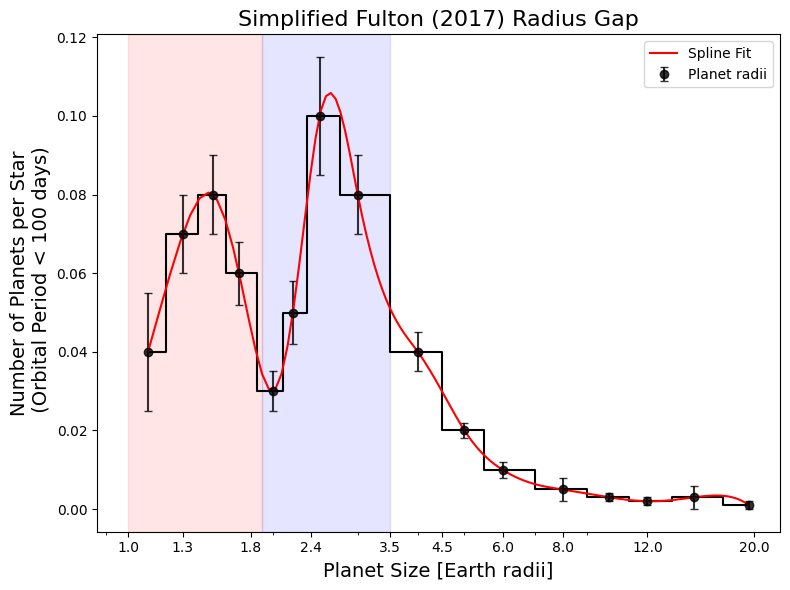

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Data for the black curve
x_black = np.array([1.1, 1.3, 1.5, 1.7, 2.0, 2.2, 2.5, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 15.0, 19.5])
y_black = np.array([0.04, 0.07, 0.08, 0.06, 0.03, 0.05, 0.10, 0.08, 0.04, 0.02, 0.01, 0.005, 0.003, 0.002, 0.003, 0.001])
y_err_black = np.array([0.015, 0.01, 0.01, 0.008, 0.005, 0.008, 0.015, 0.01, 0.005, 0.002, 0.002, 0.003, 0.001, 0.001, 0.003, 0.001])

# Interpolating the red curve as a spline fit to the black curve
x_spline = np.linspace(min(x_black), max(x_black), 300)
spline = make_interp_spline(x_black, y_black)
y_spline = spline(x_spline)

# Plotting the figure
plt.figure(figsize=(8, 6))

# Plot black curve with error bars
plt.errorbar(x_black, y_black, yerr=y_err_black, fmt='o', color='black', label='Planet radii', capsize=3, alpha=0.8)

plt.step(x_black, y_black, where='mid', color='black', linestyle='-')

# Plot red spline curve
plt.plot(x_spline, y_spline, color='red', label='Spline Fit', linestyle='-')

# Highlighting regions for bimodal radius distribution
plt.axvspan(1.0, 1.9, color='red', alpha=0.1)
plt.axvspan(1.9, 3.5, color='blue', alpha=0.1)

# Customize axes
plt.xscale('log')
plt.xlabel('Planet Size [Earth radii]', fontsize=14)
plt.ylabel(f'Number of Planets per Star\n (Orbital Period < 100 days)', fontsize=14)
plt.title('Simplified Fulton (2017) Radius Gap', fontsize=16)
plt.legend()
xticks = [1.0, 1.3, 1.8, 2.4, 3.5, 4.5, 6.0, 8.0, 12.0, 20.0]
plt.xticks(xticks, labels=[f'{tick}' for tick in xticks])
plt.tight_layout()

# Display the plot
plt.show()
